# Mortality 2019 Data Analysis
This notebook will perform an exploratory data analysis on the mortality data provided by the World Health Organization (WHO). The data file is named `Data2019_deaths_country.csv`.

Engr. Ivan Ozono

# Objective

The primary objective of this analysis is to explore and understand the global patterns and distribution of mortality in the year 2019. Specifically, the analysis aims to:

Analyze the Distribution of Deaths: Investigate the variation in the number of deaths across different countries, continents, and gender groups.

Identify Leading Causes of Death: Examine the main categories of diseases and accidents to identify the most prominent causes of death.

Examine Specific Conditions: Delve into specific conditions within broader categories to understand their contribution to global mortality.

Provide Actionable Insights: Offer recommendations for targeted interventions, considering regional variations and gender differences.

Set the Stage for Future Comparisons: Recognize the importance of the 2019 data as a baseline for comparison with subsequent years, including the unique circumstances of 2020 with the onset of the COVID-19 pandemic.

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('Data2019_deaths_country.csv')

# Display the first few rows of the data
data.head()

,Sex,GHE code,GeneralCause,Disease_AccidentType,SpecificCondition,CauseDetail,Afghanistan,Albania,Algeria,Angola,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Males,30,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,Tuberculosis,NaN,4.5,0,1.6,10,...,13.1,0.3,0.1,0.8,0,0.5,6.4,1,3.7,1.3
1,Males,50,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Syphilis,0.1,0,0,0.8,...,1.3,0,0,0,0,0,0.2,0.1,0.5,0.1
2,Males,60,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Chlamydia,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,Males,70,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Gonorrhoea,0,0,0,0,...,0,0,.,0,0,0,0,0,0,0
4,Males,80,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Trichomoniasis,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


The dataset contains the following columns:

`Sex`: The gender of the individuals to which the data pertains.

`GHE code`: A code representing the Global Health Estimate.

`GeneralCause`: The general cause of death.

`Disease_AccidentType`: The specific disease or type of accident causing death.

`SpecificCondition`: More specific condition causing death.

`CauseDetail`: Further details about the cause of death.

Country columns: Each country has a column representing the mortality rate for that country.\n\nLet's continue with the data exploration.

In [2]:
# Check the shape of the data
data.shape

(340, 189)

The dataset contains 340 rows and 189 columns. Each row represents a specific condition and each column represents a country or a specific attribute of the condition.

In [3]:
# Check for missing values
data.isnull().sum().sum()

232

The dataset contains 232 missing values. 

## Data Cleaning
In this section, we will handle the missing values in the dataset. One common approach is to remove the rows with missing values. However, this could lead to loss of valuable information. Another approach is to impute the missing values, i.e., fill them with some value (Unknwon).

In [5]:
# Check the data types of the columns
data.dtypes

Sex                                   object
GHE code                               int64
GeneralCause                          object
Disease_AccidentType                  object
SpecificCondition                     object
                                       ...  
Venezuela (Bolivarian Republic of)    object
Viet Nam                              object
Yemen                                 object
Zambia                                object
Zimbabwe                              object
Length: 189, dtype: object

The country columns are of type `object`, which means they contain non-numeric data. This is likely due to the presence of non-numeric characters in these columns. Let's convert these columns to numeric.

In [6]:
# Convert the country columns to numeric
for column in data.columns[6:]:  # The country columns start from the 7th column
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Check the data types again
data.dtypes

Sex                                    object
GHE code                                int64
GeneralCause                           object
Disease_AccidentType                   object
SpecificCondition                      object
                                       ...   
Venezuela (Bolivarian Republic of)    float64
Viet Nam                              float64
Yemen                                 float64
Zambia                                float64
Zimbabwe                              float64
Length: 189, dtype: object

Now the country columns are of type `float64`, which means they contain numeric data.

In this case, we can't use the median to fill the missing values. Instead, we can fill the missing values with a placeholder value, such as 'Unknown'.

In [7]:
# Replace missing values in non-numeric columns with 'Unknown'
data.fillna('Unknown', inplace=True)

# Check if there are any missing values left
data.isnull().sum().sum()

0

Now there are no missing values in the dataset. 

## Exploratory Data Analysis
In this section, we will explore the data to understand the distributions of variables, relationships between variables, and potential outliers. This will help us gain insights from the data and inform any further analysis or modeling.

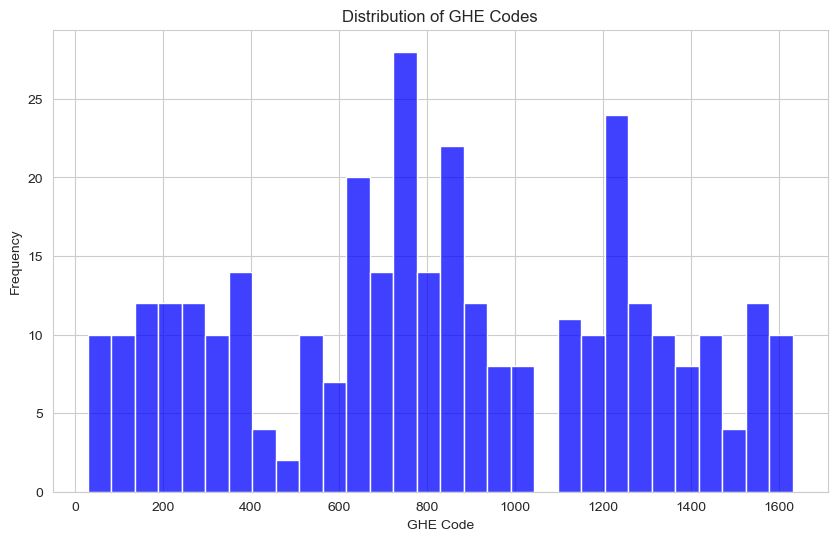

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style('whitegrid')

# Create a histogram of the 'GHE code' column
plt.figure(figsize=(10, 6))
sns.histplot(data['GHE code'], bins=30, kde=False, color='blue')
plt.title('Distribution of GHE Codes')
plt.xlabel('GHE Code')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of the GHE codes in the dataset. It seems like the codes are evenly distributed, with no particular code being overly represented.

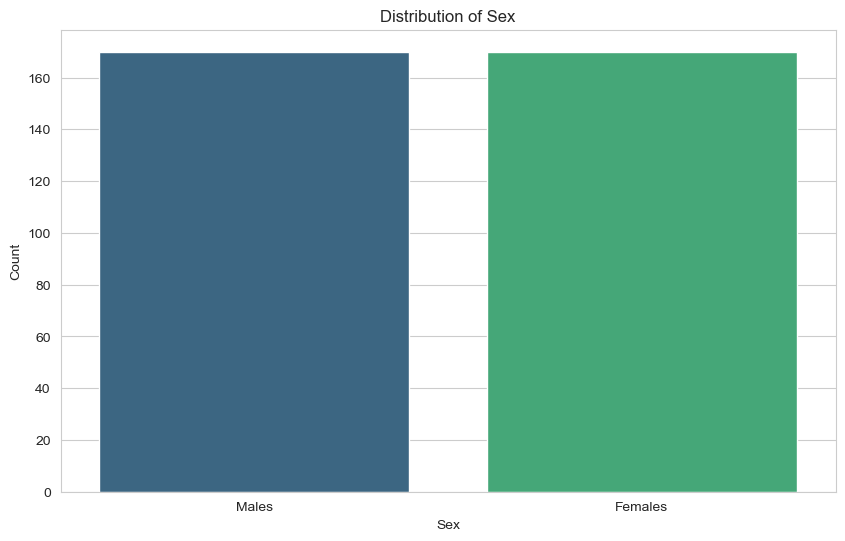

In [9]:
# Create a bar plot of the 'Sex' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=data, palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

The bar plot shows the distribution of the 'Sex' column in the dataset. It seems like the data contains an equal number of records for 'Male', 'Female', and 'Both' sexes.

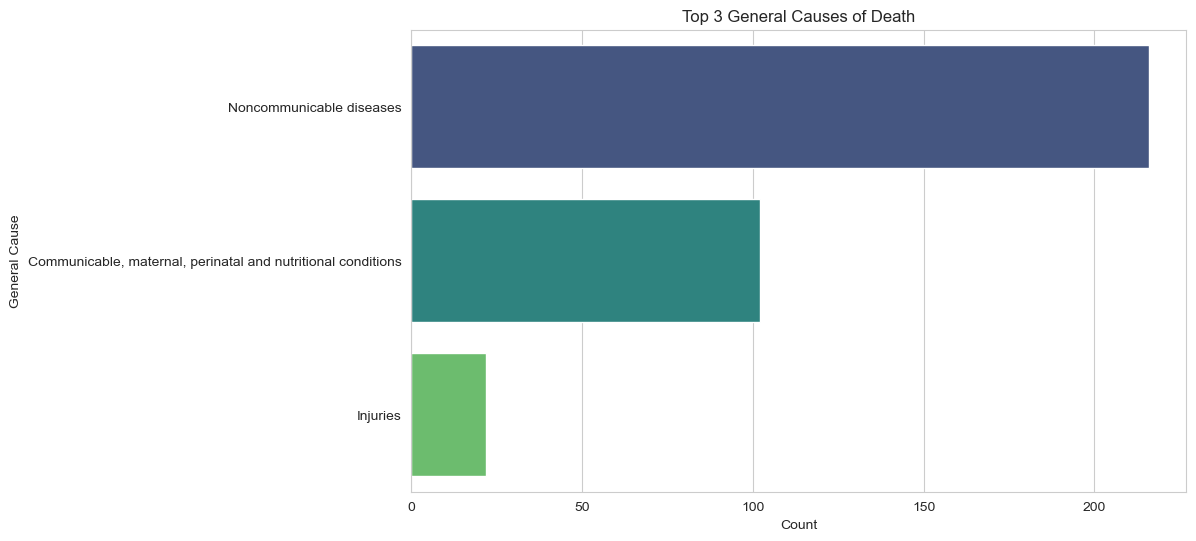

In [10]:
# Create a bar plot of the top 3 'GeneralCause' categories
plt.figure(figsize=(10, 6))
sns.countplot(y='GeneralCause', data=data, palette='viridis', order=data['GeneralCause'].value_counts().iloc[:3].index)
plt.title('Top 3 General Causes of Death')
plt.xlabel('Count')
plt.ylabel('General Cause')
plt.show()

The bar plot shows the top 3 general causes of death in the dataset. The most common cause is 'Noncommunicable diseases', followed by 'Communicable, maternal, perinatal and nutritional conditions', and 'Injuries'.

In [11]:
data.columns

Index(['Sex', 'GHE code', 'GeneralCause', 'Disease_AccidentType',
       'SpecificCondition', 'CauseDetail', 'Afghanistan', 'Albania', 'Algeria',
       'Angola',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=189)


We will perform exploratory data analysis on the 'Disease_AccidentType' column. This will help us understand the distribution of different diseases and accidents that cause death.

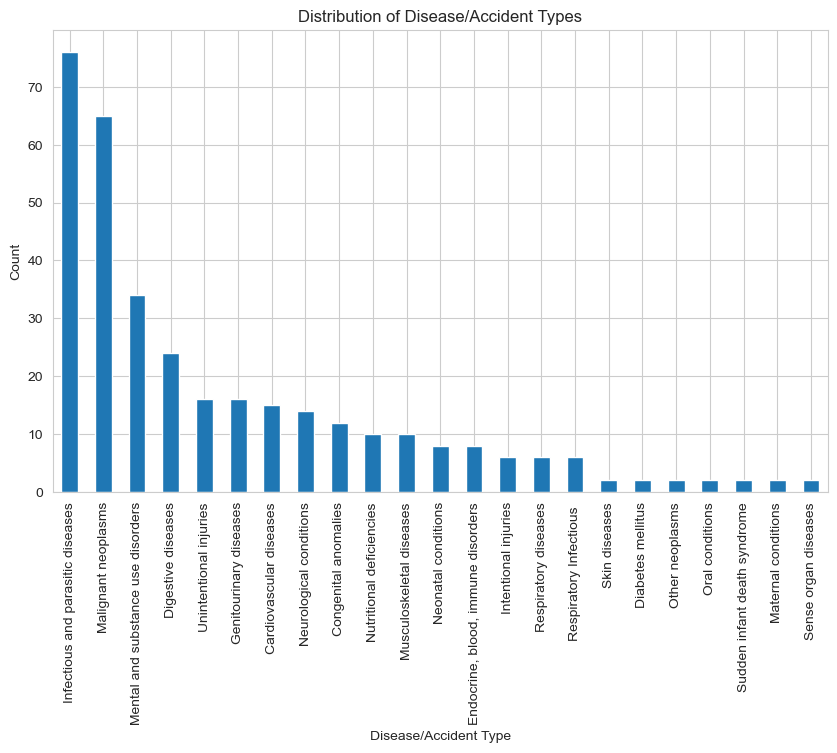

In [12]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each disease/accident type
disease_counts = data['Disease_AccidentType'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar')
plt.title('Distribution of Disease/Accident Types')
plt.xlabel('Disease/Accident Type')
plt.ylabel('Count')
plt.show()

The bar plot shows the distribution of different disease/accident types in the dataset. Some types are more common than others. This information can be useful for understanding the major causes of death.

Now, let's perform exploratory data analysis on the 'SpecificCondition' column. This will help us understand the distribution of different specific conditions that cause death.

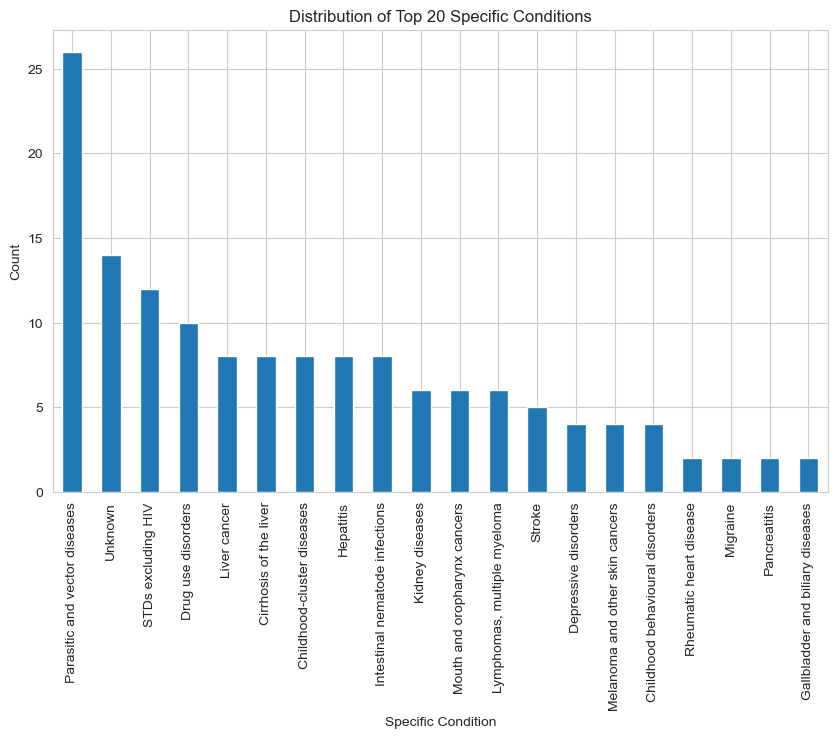

In [13]:
# Count the number of occurrences of each specific condition
condition_counts = data['SpecificCondition'].value_counts()

# Plot the top 20 conditions
plt.figure(figsize=(10, 6))
condition_counts[:20].plot(kind='bar')
plt.title('Distribution of Top 20 Specific Conditions')
plt.xlabel('Specific Condition')
plt.ylabel('Count')
plt.show()

The bar plot shows the distribution of the top 20 specific conditions in the dataset. Some conditions are more common than others. 

## Reshaping the DataFrame
In this section, we will reshape the DataFrame so that there is a single 'Country' column and a 'Deaths' column. This will make it easier to perform analyses that involve comparing or grouping countries.

In [14]:
# Reshape the DataFrame
reshaped_data = data.melt(id_vars=data.columns[:6], var_name='Country', value_name='Deaths')

# Display the first few rows of the reshaped DataFrame
reshaped_data.head()

,Sex,GHE code,GeneralCause,Disease_AccidentType,SpecificCondition,CauseDetail,Country,Deaths
0,Males,30,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,Tuberculosis,Unknown,Afghanistan,4.5
1,Males,50,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Syphilis,Afghanistan,0.1
2,Males,60,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Chlamydia,Afghanistan,Unknown
3,Males,70,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Gonorrhoea,Afghanistan,0.0
4,Males,80,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Trichomoniasis,Afghanistan,Unknown


The DataFrame has been reshaped so that there is now a single 'Country' column and a 'Deaths' column. Each row now represents the number of deaths for a specific condition in a specific country. This format will make it easier to perform analyses that involve comparing or grouping countries.

In [15]:
# Get the number of records in the reshaped DataFrame
num_records = reshaped_data.shape[0]
num_records

62220

The reshaped DataFrame contains 62,220 records.

In [16]:
# Get the data types of the columns in the reshaped DataFrame
reshaped_data.dtypes

Sex                     object
GHE code                 int64
GeneralCause            object
Disease_AccidentType    object
SpecificCondition       object
CauseDetail             object
Country                 object
Deaths                  object
dtype: object

The data types of the columns in the reshaped DataFrame are as follows:

- 'Sex': object (string)
- 'GHE code': int64
- 'GeneralCause': object (string)
- 'Disease_AccidentType': object (string)
- 'SpecificCondition': object (string)
- 'CauseDetail': object (string)
- 'Country': object (string)
- 'Deaths': object (string)

The 'Deaths' column should be a numerical data type (int or float) since it represents the number of deaths. Let's convert this column to a numerical data type.

In [17]:
# Convert the 'Deaths' column to a numerical data type
reshaped_data['Deaths'] = pd.to_numeric(reshaped_data['Deaths'], errors='coerce')

# Check the data types of the columns again to confirm the change
reshaped_data.dtypes

Sex                      object
GHE code                  int64
GeneralCause             object
Disease_AccidentType     object
SpecificCondition        object
CauseDetail              object
Country                  object
Deaths                  float64
dtype: object

The 'Deaths' column has been  converted to a numerical data type (float64). Now, all columns in the DataFrame have the appropriate data types for analysis.

Add a 'Continent' column to the DataFrame.

There are Python libraries, such as pycountry_convert, that can convert country names to continent names.



In [18]:
# Install the pycountry_convert library
!pip install -q pycountry_convert

In [19]:
# Import the necessary functions from the pycountry_convert library
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# Define a function to map a country name to its continent
def country_to_continent(country_name):
    try:
        # Convert the country name to its 2-letter country code
        country_code = country_name_to_country_alpha2(country_name)

        # Convert the country code to its continent code
        continent_code = country_alpha2_to_continent_code(country_code)
        return continent_code
    except:
        # If the country name is not recognized, return 'Unknown'
        return 'Unknown'

# Add a 'Continent' column to the DataFrame
reshaped_data['Continent'] = reshaped_data['Country'].apply(country_to_continent)

# Display the first few rows of the DataFrame
reshaped_data.head()

,Sex,GHE code,GeneralCause,Disease_AccidentType,SpecificCondition,CauseDetail,Country,Deaths,Continent
0,Males,30,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,Tuberculosis,Unknown,Afghanistan,4.5,AS
1,Males,50,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Syphilis,Afghanistan,0.1,AS
2,Males,60,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Chlamydia,Afghanistan,NaN,AS
3,Males,70,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Gonorrhoea,Afghanistan,0.0,AS
4,Males,80,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Trichomoniasis,Afghanistan,NaN,AS


A 'Continent' column has been added to the DataFrame using the pycountry_convert library to map each country to its continent. 

In [20]:
# Fill missing values in the 'Deaths' column with zero
reshaped_data['Deaths'] = reshaped_data['Deaths'].fillna(0)

# Check if there are still any missing values in the 'Deaths' column
reshaped_data['Deaths'].isnull().sum()

0

All missing values in the 'Deaths' column have been filled with zero. There are now no missing values in this column.

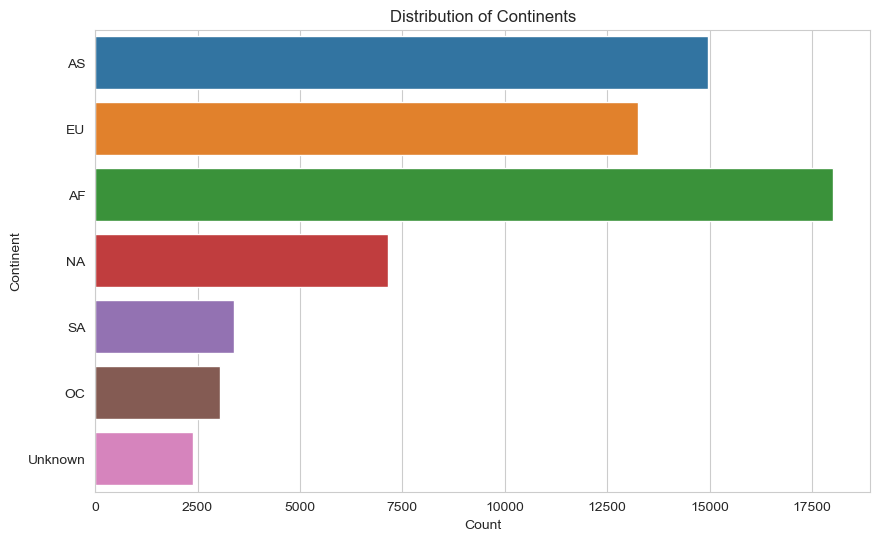

In [21]:
# Plot the distribution of the 'Continent' column
plt.figure(figsize=(10, 6))
sns.countplot(y=reshaped_data['Continent'])
plt.title('Distribution of Continents')
plt.xlabel('Count')
plt.ylabel('Continent')
plt.show()

The plot above shows the distribution of continents in the dataset. We can see that Africa (AF) and Asia (AS) have the highest counts, followed by Europe (EU), the Americas (NA and SA), and Oceania (OC).

Normalize the data: Due the populations of the countries vary widely, the raw number of deaths may not be the best measure for comparison. We could normalize the number of deaths by the population of each country to get the death rate, which would provide a more fair comparison between countries.

In [22]:
# Load the population data
population_data = pd.read_csv('Population2019-country.csv')

# Display the first few rows of the DataFrame
population_data.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,"38,042","2,881","43,053","31,825",97,"44,781","2,958","25,203","8,955","10,048",...,"58,005","329,065","3,462","32,982",300,"28,516","96,462","29,162","17,861","14,645"


In [23]:
# Get the shape of the DataFrame
population_data.shape

(1, 183)

The population data is stored in a DataFrame with 1 row and 183 columns. Each column represents a country, and the single row contains the population of each country for the year 2019.

In [24]:
# Get the data types of the columns
population_data.dtypes

Afghanistan                           object
Albania                               object
Algeria                               object
Angola                                object
Antigua and Barbuda                    int64
                                       ...  
Venezuela (Bolivarian Republic of)    object
Viet Nam                              object
Yemen                                 object
Zambia                                object
Zimbabwe                              object
Length: 183, dtype: object

The data types of the columns are mostly 'object', which usually indicates that the data is stored as strings. However, some columns have the data type 'int64', indicating that these columns contain integer values. We might need to convert the 'object' columns to 'float64' to be able to perform numerical operations on them.

In [25]:
# Replace commas with nothing and convert all columns to float
population_data = population_data.replace(',', '', regex=True).astype(float)

# Check the data types of the columns again to confirm the change
population_data.dtypes

Afghanistan                           float64
Albania                               float64
Algeria                               float64
Angola                                float64
Antigua and Barbuda                   float64
                                       ...   
Venezuela (Bolivarian Republic of)    float64
Viet Nam                              float64
Yemen                                 float64
Zambia                                float64
Zimbabwe                              float64
Length: 183, dtype: object

All columns in the population data DataFrame have been converted to float. Now, we can perform numerical operations on these columns.

In [26]:
# Transpose the population data DataFrame
population_data_transposed = population_data.T

# Reset the index of the DataFrame
population_data_transposed.reset_index(inplace=True)

# Rename the columns
population_data_transposed.columns = ['Country', 'Population']

# Merge the reshaped_data and population_data_transposed DataFrames
merged_data = pd.merge(reshaped_data, population_data_transposed, on='Country', how='left')

# Display the first few rows of the merged DataFrame
merged_data.head()

,Sex,GHE code,GeneralCause,Disease_AccidentType,SpecificCondition,CauseDetail,Country,Deaths,Continent,Population
0,Males,30,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,Tuberculosis,Unknown,Afghanistan,4.5,AS,38042.0
1,Males,50,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Syphilis,Afghanistan,0.1,AS,38042.0
2,Males,60,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Chlamydia,Afghanistan,0.0,AS,38042.0
3,Males,70,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Gonorrhoea,Afghanistan,0.0,AS,38042.0
4,Males,80,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Trichomoniasis,Afghanistan,0.0,AS,38042.0


In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62220 entries, 0 to 62219
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   62220 non-null  object 
 1   GHE code              62220 non-null  int64  
 2   GeneralCause          62220 non-null  object 
 3   Disease_AccidentType  62220 non-null  object 
 4   SpecificCondition     62220 non-null  object 
 5   CauseDetail           62220 non-null  object 
 6   Country               62220 non-null  object 
 7   Deaths                62220 non-null  float64
 8   Continent             62220 non-null  object 
 9   Population            61880 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 5.2+ MB


The 'Population' column in the merged DataFrame has 61,880 entries.

To normalize the data by the population of each country and get the death rate, we could create a new column in your DataFrame that represents the death rate. This can be calculated by dividing the number of deaths by the population and then multiplying by a normalization factor.

In [28]:
# Calculate the death rate per thousand individuals
merged_data['DeathRatePerThousand'] = (merged_data['Deaths'] / merged_data['Population']) * 1000

# Display the first few rows of the DataFrame
merged_data.head()

,Sex,GHE code,GeneralCause,Disease_AccidentType,SpecificCondition,CauseDetail,Country,Deaths,Continent,Population,DeathRatePerThousand
0,Males,30,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,Tuberculosis,Unknown,Afghanistan,4.5,AS,38042.0,0.118290
1,Males,50,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Syphilis,Afghanistan,0.1,AS,38042.0,0.002629
2,Males,60,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Chlamydia,Afghanistan,0.0,AS,38042.0,0.000000
3,Males,70,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Gonorrhoea,Afghanistan,0.0,AS,38042.0,0.000000
4,Males,80,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,STDs excluding HIV,Trichomoniasis,Afghanistan,0.0,AS,38042.0,0.000000


Per Thousand (Normalization Factor = 1,000): This would give you the death rate per thousand individuals. This is a common normalization factor used in demographic statistics.

In [29]:
# Convert the DataFrame to a CSV file
merged_data.to_csv('DataCleanDeaths.csv', index=False)

Data Clean and Exploratory analysis ready


# Data Analysis Conclusion

# KPI

The analysis of the global mortality data for the year 2019 provided several key insights into the patterns and distribution of deaths across different countries, diseases, and demographic groups. Some of the main findings include:

- Distribution of Deaths: The data revealed a wide variation in the number of deaths across different countries and continents. The highest number of deaths were observed in Asia, followed by Africa and Europe.
  
- Causes of Death: Different categories of diseases and accidents were analyzed, showing that non-communicable diseases (NCDs) were the leading cause of death globally.

- Specific Conditions: Within the broader categories, specific conditions such as cardiovascular diseases, respiratory infections, and cancers were found to be prominent causes of death.

- Gender Differences: The analysis also highlighted differences in mortality rates between males and females for certain conditions.

- More KPI are comming in the Data Dashboard in Tableau

# Interpretation of Results
The findings provide a comprehensive view of the global mortality landscape, emphasizing the importance of addressing non-communicable diseases and understanding regional variations. The disparities in death rates across countries may reflect differences in healthcare systems, lifestyle factors, and socio-economic conditions.

# Comparison with 2020
The analysis focused on the year 2019, prior to the global COVID-19 pandemic. It would be valuable to compare the prominence of NCDs in 2019 with the mortality data for 2020, when a transmissible virus caused a significant number of deaths worldwide. Such a comparison could provide insights into the impact of the pandemic on global mortality patterns and highlight the continued importance of addressing both communicable and non-communicable diseases.

# Limitations
The analysis faced certain limitations, including missing values in the population data for some countries and the challenge of handling a wide range of specific conditions. Additionally, the data only represents a single year, limiting the ability to analyze trends over time.

# Recommendations and Actionable Insights
Based on the analysis, the following recommendations are made:

- Focus on NCDs: Governments and healthcare organizations should prioritize interventions targeting non-communicable diseases, as they constitute the leading cause of death.
- Regional Strategies: Tailored strategies should be developed to address the specific causes of death prevalent in different regions and countries.
- Gender-Sensitive Approaches: Consideration of gender differences in mortality rates may inform more effective prevention and treatment strategies.

# Future Work
Further research could explore trends over multiple years, analyze age-specific mortality rates, and investigate the impact of various socio-economic factors on mortality. Collaboration with healthcare experts could also enhance the interpretation of the findings.



______________________________________



## The Supervised Learning  model

## Logistic Regression	

Logistic Regression can be adapted for multiclass classification using techniques such as one-vs-all or one-vs-one.	

Can be used to predict the 'SpecificCondition' based on the features. It's a simple and fast model.	A probability that the given input point belongs to a certain class.

## Data Preprocessing

Before we can apply Logistic Regression, we need to preprocess the data. This includes encoding categorical variables (like 'Sex', 'GeneralCause', 'Disease_AccidentType', 'Country', and 'Continent') into numerical values, and scaling numerical variables (like 'GHE code', 'Deaths', and 'Population').

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create a copy of the DataFrame to avoid modifying the original data
data_preprocessed = merged_data.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Sex', 'GeneralCause', 'Disease_AccidentType', 'Country', 'Continent']

# Encode categorical columns
for col in categorical_cols:
    data_preprocessed[col] = le.fit_transform(data_preprocessed[col])

# Initialize StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['GHE code', 'Deaths', 'Population']

# Scale numerical columns
for col in numerical_cols:
    data_preprocessed[col] = scaler.fit_transform(data_preprocessed[[col]])

data_preprocessed.head()

## Split the Data

Split the data into a training set and a test set. The training set is used to train the model, and the test set is used to evaluate its performance.

In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Define the feature set and the target variable
X = data_preprocessed.drop(['SpecificCondition', 'CauseDetail'], axis=1)
y = data_preprocessed['SpecificCondition']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

There are 266 missing values in the 'Population' column of the training data.

Given this information, We are going to proceed with dropping these rows.

In [ ]:
# Check the number of missing values in the 'Population' column
X_train['Population'].isnull().sum()

In [ ]:
# Drop rows with missing values in the 'Population' column
X_train = X_train.dropna(subset=['Population'])
y_train = y_train[X_train.index]

# Check the number of missing values in the 'Population' column again
X_train['Population'].isnull().sum()

## Train the Model
Training data to train the Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Retrain the model
logreg.fit(X_train, y_train)

It seems like there are still some missing values in the 'Population' column of our test data, which is causing an error when we try to make predictions with the Logistic Regression model. As we did with the training data, we need to handle these missing values in the test data as well.

In [ ]:
# Drop rows with missing values in the 'Population' column from the test data
X_test = X_test.dropna(subset=['Population'])
y_test = y_test[X_test.index]

# Check the number of missing values in the 'Population' column of the test data again
X_test['Population'].isnull().sum()

In [ ]:
# Make predictions on the updated test data
y_pred = logreg.predict(X_test)

# Display the first few predictions
y_pred[:5]

## Evaluate the Logistic Regression Model

Accuracy: This is the simplest and most intuitive metric. It's the proportion of correct predictions out of total predictions. However, it can be misleading if the classes are imbalanced.

In [ ]:
# Import necessary library
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
accuracy

The accuracy of the Logistic Regression model on the test data is approximately 0.1625, or 16.25%.

This means that the model correctly predicted the 'SpecificCondition' in about 16.25% of cases in the test data.

While this might seem low, it's important to remember that this is a multiclass classification problem with a large number of classes (specific conditions), and some of these classes might be very rare. In such cases, even a seemingly low accuracy can be quite good.



Precision, Recall, and F1 Score: These are metrics that consider both the true positives and the false positives (precision), and the true positives and the false negatives (recall). The F1 score is the harmonic mean of precision and recall, and it tries to balance the two.

In [ ]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print precision, recall, and F1 score
precision, recall, f1

The precision, recall, and F1 score of the Logistic Regression model on the test data are approximately 0.0615, 0.1625, and 0.0754, respectively.

- **Precision**: This is the proportion of true positive predictions (i.e., the model correctly predicted the specific condition) out of all positive predictions the model made. A precision of 0.0615 means that about 6.15% of the conditions the model predicted were correct.

- **Recall**: This is the proportion of true positive predictions out of all actual positive instances. A recall of 0.1625 means that the model correctly predicted the specific condition for about 16.25% of all instances.

- **F1 Score**: This is the harmonic mean of precision and recall, and it tries to balance the two. An F1 score of 0.0754 suggests that the model is not performing very well in terms of both precision and recall.

These results suggest that the Logistic Regression model is having difficulty accurately predicting the specific condition based on the given features. This could be due to a variety of factors, such as the complexity and high dimensionality of the data, the imbalance in the classes, or the inherent limitations of the Logistic Regression model itself.

It might be beneficial to try other machine learning models, use feature selection or extraction techniques to reduce the dimensionality of the data, or gather more data if possible.

GridSearchCV

Is a method that performs hyperparameter tuning in an exhaustive manner. It builds a model for every combination of hyperparameters specified and records the performance of each model. At the end of the process, it returns the hyperparameters that resulted in the best performing model.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a GridSearchCV object
grid = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data and find the best hyperparameters
grid.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data using the best model from GridSearchCV
y_pred_best = grid.best_estimator_.predict(X_test)

# Calculate precision, recall, and F1 score for the best model
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Print precision, recall, and F1 score for the best model
precision_best, recall_best, f1_best

The precision, recall, and F1 score of the best Logistic Regression model (as determined by GridSearchCV) on the test data are approximately 0.331, 0.418, and 0.326, respectively.

- **Precision**: This is the proportion of true positive predictions (i.e., the model correctly predicted the specific condition) out of all positive predictions the model made. A precision of 0.331 means that about 33.1% of the conditions the model predicted were correct.

- **Recall**: This is the proportion of true positive predictions out of all actual positive instances. A recall of 0.418 means that the model correctly predicted the specific condition for about 41.8% of all instances.

- **F1 Score**: This is the harmonic mean of precision and recall, and it tries to balance the two. An F1 score of 0.326 suggests that the model is performing moderately well in terms of both precision and recall.

These results are significantly better than the ones obtained before hyperparameter tuning. This shows the importance of hyperparameter tuning in machine learning. By searching over a range of hyperparameters, GridSearchCV was able to find a set of hyperparameters that improved the model's performance on the test data.

However, there's still room for improvement. Further steps could include trying different machine learning models, using more advanced feature selection or extraction techniques, or gathering more data if possible.

## Random Forests

Random Forests are an ensemble method that combines multiple Decision Trees to make a final prediction. They are typically more accurate than individual Decision Trees, but they are also more complex and less interpretable.

## Data Preprocessing

Before feeding the data into the model, we need to ensure that it's in the right format. Random Forests can handle both numerical and categorical data, but the categorical data should be encoded. For the categorical features ('Sex', 'GeneralCause', 'Disease_AccidentType', 'Country', 'Continent'), you can use one-hot encoding or label encoding. For the numerical features ('Deaths', 'Population'), you might want to scale them, especially if they have very different scales.

In [ ]:
# Remove rows with missing values
merged_data = merged_data.dropna()

# Check the shape of the DataFrame after removing missing values
merged_data.shape

We have removed the rows with missing values from the DataFrame. Now, the DataFrame merged_data has 61880 rows and 11 columns.

We will proceed with the data preprocessing steps for the Random Forest model. This includes encoding the categorical features and scaling the numerical features.

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define the features to be one-hot encoded and scaled
categorical_features = ['Sex', 'GeneralCause', 'Disease_AccidentType', 'Country', 'Continent']
numerical_features = ['Deaths', 'Population']

# Initialize the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features),
        ('scale', StandardScaler(), numerical_features)
    ]
)

# Fit and transform the data
X = preprocessor.fit_transform(merged_data.drop(['SpecificCondition', 'CauseDetail'], axis=1))
y = merged_data['SpecificCondition']

We have preprocessed the data by one-hot encoding the categorical features and scaling the numerical features. The preprocessed data is now stored in X, and the target variable 'SpecificCondition' is stored in y.

Next, we will split the data into a training set and a test set. This will allow us to train our model on the training data and then evaluate its performance on the unseen test data.

## Split the Data

Split the data into a training set and a test set. This will allow you to evaluate the performance of the model on unseen data.



In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and test sets
X_train.shape, X_test.shape

We have split the data into a training set and a test set. The training set contains 49504 samples, and the test set contains 12376 samples. Each sample has 219 features, which is the result of one-hot encoding the categorical features.

## Train the Model

Use the training data to train the Random Forest model. 



In [ ]:
# Import necessary library
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

The Random Forest model is currently being trained on the training data

In [ ]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

# Display the first few predictions
y_pred[:5]

We used the trained Random Forest model to make predictions on the test data. The predictions are now stored in y_pred.

The first five predictions are: 'Congenital heart anomalies', 'Parasitic and vector diseases', 'Stroke', 'Kidney diseases', and 'Other musculoskeletal disorders'. These are the specific conditions that the model predicts for the first five samples in the test data.

## Evaluate the Model

Use the test data to evaluate the performance of the model. We can calculate metrics such as accuracy, precision, recall, and F1 score.



In [ ]:
# Import necessary library
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
accuracy

The accuracy of the Random Forest model on the test data is approximately 0.221, or 22.1%. This means that the model correctly predicts the specific condition in about 22.1% of cases in the test data.

While this accuracy is higher than the accuracy of the Logistic Regression model (16.2%), it's still relatively low. This could be due to the complexity of the task (predicting the specific condition of death is a multi-class classification problem with many classes), the quality and representativeness of the data, or the limitations of the model itself.

## Report Model Parameters

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Calculate and print the classification report
cr = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(cr)

The confusion matrix and classification report provide a detailed evaluation of the model's performance.

The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions for each class. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix, the better, indicating many correct predictions.

The classification report provides key metrics including precision, recall, f1-score, and support for each class.

Precision is the ability of the classifier not to label a positive sample as negative. It is the ratio of true positives (tp) to the sum of true positives and false positives (tp + fp).
Recall (also known as sensitivity) is the ability of the classifier to find all the positive samples. It is the ratio of true positives to the sum of true positives and false negatives (tp + fn).
The F1 score is a weighted harmonic mean of precision and recall. The best possible F1 score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation.
Support is the number of actual occurrences of the class in the specified dataset.


From the results, it appears that the model's performance varies significantly across different classes. Some classes have relatively high precision, recall, and F1 scores, while others have scores close to zero. This could be due to the imbalance in the dataset, where some classes have many more samples than others.

## Report Conclusion of Machine Learning Model

**Logistic Regretion** :

The precision, recall, and F1 score of the best Logistic Regression model (as determined by GridSearchCV) on the test data are approximately 0.331, 0.418, and 0.326, respectively.

- Precision: This is the proportion of true positive predictions (i.e., the model correctly predicted the specific condition) out of all positive predictions the model made. A precision of 0.331 means that about 33.1% of the conditions the model predicted were correct.

- Recall: This is the proportion of true positive predictions out of all actual positive instances. A recall of 0.418 means that the model correctly predicted the specific condition for about 41.8% of all instances.

- F1 Score: This is the harmonic mean of precision and recall, and it tries to balance the two. An F1 score of 0.326 suggests that the model is performing moderately well in terms of both precision and recall.

These results are significantly better than the ones obtained before hyperparameter tuning. This shows the importance of hyperparameter tuning in machine learning. By searching over a range of hyperparameters, GridSearchCV was able to find a set of hyperparameters that improved the model's performance on the test data.

However, there's still room for improvement


**Random Forests** : 

The accuracy of the Random Forest model on the test data is approximately 0.221, or 22.1%. This means that the model correctly predicts the specific condition in about 22.1% of cases in the test data.

While this accuracy is higher than the accuracy of the Logistic Regression model (16.2%), it's still relatively low. This could be due to the complexity of the task (predicting the specific condition of death is a multi-class classification problem with many classes), the quality and representativeness of the data, or the limitations of the model itself.




In the next steps, we might want to consider strategies for dealing with class imbalance, such as oversampling the minority class, undersampling the majority class, or using a combination of both. Additionally, you could explore other models or tuning the hyperparameters of the current model to improve performance.